In [ ]:
from utils import (adstock, s_curve, create_transformed_tables, 
                   plot_stacked_area_with_actual, plot_transformed_vs_raw, 
                   plot_data_set, plot_actual_fitted_residuals, plot_response_curve)
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [ ]:
# Load CSVs as dataframes

df_data = pd.read_csv('Data/df_data.csv', index_col=0, parse_dates=True)
df_trans = pd.read_csv('Data/df_trans.csv', index_col=0, parse_dates=True)
df_trans_norm = pd.read_csv('Data/df_trans_norm.csv', index_col=0, parse_dates=True)
df_values = pd.read_csv('Data/df_values.csv', index_col=0, parse_dates=True)
df_var_spec = pd.read_csv('Data/df_var_spec.csv', index_col=0)

df_trans2 = pd.read_csv('Data/df_trans2.csv', index_col=0, parse_dates=True)
df_trans_norm2 = pd.read_csv('Data/df_trans_norm2.csv', index_col=0, parse_dates=True)
df_values2 = pd.read_csv('Data/df_values2.csv', index_col=0, parse_dates=True)
df_var_spec2 = pd.read_csv('Data/df_var_spec2.csv', index_col=0)


# print(df_var_spec)
# df_data.head(), df_trans.head(), df_values.head()

In [3]:
X = df_trans_norm.copy()
# Remove columns not needed (if any)
X = X[[col for col in X.columns if col != 'actual' and col != 'error']]
y = df_values['actual']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# Print summary
print(model.summary(title="model1"))
print("Standard error %:", round(np.sqrt(model.scale)/np.mean(y),3))

                                    model1                                    
Dep. Variable:                 actual   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     156.0
Date:                Thu, 31 Jul 2025   Prob (F-statistic):           5.43e-65
Time:                        09:30:11   Log-Likelihood:                -114.83
No. Observations:                 156   AIC:                             245.7
Df Residuals:                     148   BIC:                             270.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
c               19.9194      0.393     50.715   

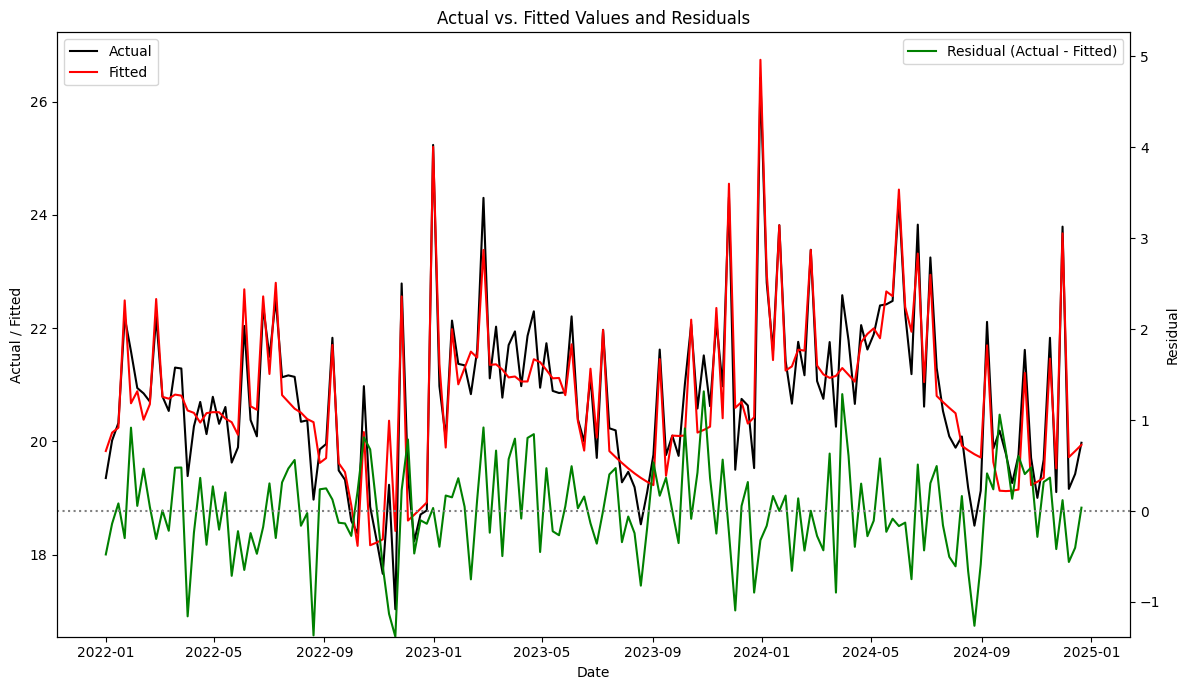

In [4]:
plot_actual_fitted_residuals(model,df_values['actual'])

In [5]:
# Get carryover value for media1 from df_var_spec
carryover_media1 = df_var_spec.loc[df_var_spec['variable'] == 'media1', 'carryover'].values[0]

# Create adstocked media1 variable as a pandas Series in df_data
media1_adstock_array = adstock(df_data['media1'].values, carryover_media1)
df_data['media1_adstock'] = pd.Series(media1_adstock_array, index=df_data.index)
media1_adstock = df_data['media1_adstock']


if 1==0:
    # Plot: raw media1 as bars (wider), adstocked media1 as a line
    plt.figure(figsize=(12, 6))
    plt.bar(df_data.index, df_data['media1'], label='Grps', color='red', width=3)
    plt.plot(df_data.index, df_data['media1_adstock'], label='Adstock', color='blue', linewidth=2)
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title('Raw (Bar) vs. Adstocked (Line) media1')
    plt.legend()
    plt.tight_layout()
    plt.show()


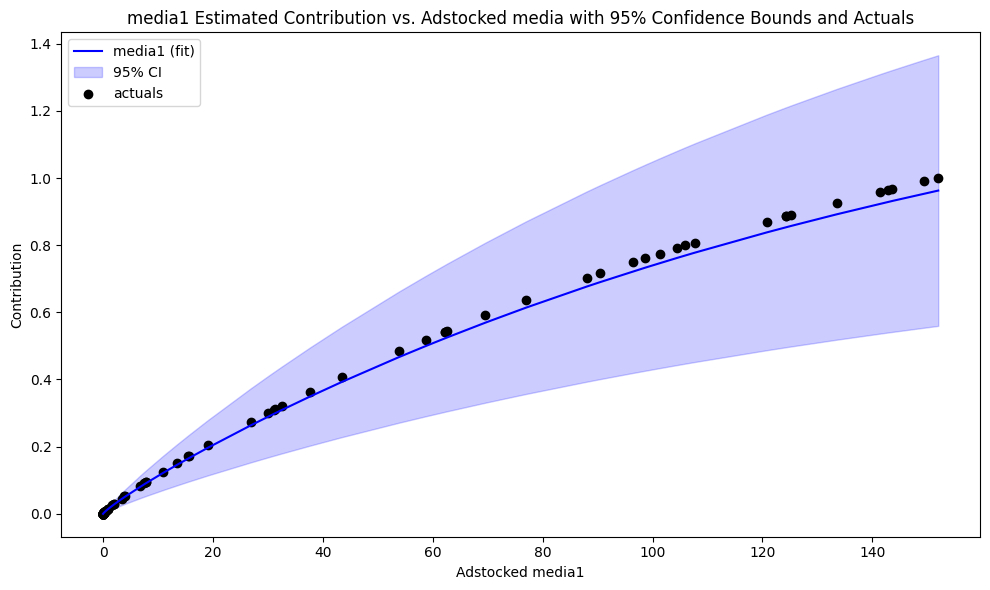

In [6]:
plot_response_curve(model,'media1', media1_adstock,df_trans_norm['media1'], df_values['media1'])

In [7]:
## regress model2
X = df_trans_norm2.copy()
# Remove columns not needed (if any)
X = X[[col for col in X.columns if col != 'actual' and col != 'error']]
y = df_values['actual']

X = sm.add_constant(X)
model2 = sm.OLS(y, X).fit()

# Print summary
print(model2.summary(title="model2"))
print("SE %:", round(np.sqrt(model2.scale)/np.mean(y),3))

                                    model2                                    
Dep. Variable:                 actual   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     155.4
Date:                Thu, 31 Jul 2025   Prob (F-statistic):           6.77e-65
Time:                        09:30:11   Log-Likelihood:                -115.06
No. Observations:                 156   AIC:                             246.1
Df Residuals:                     148   BIC:                             270.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
c               19.9842      0.389     51.377   

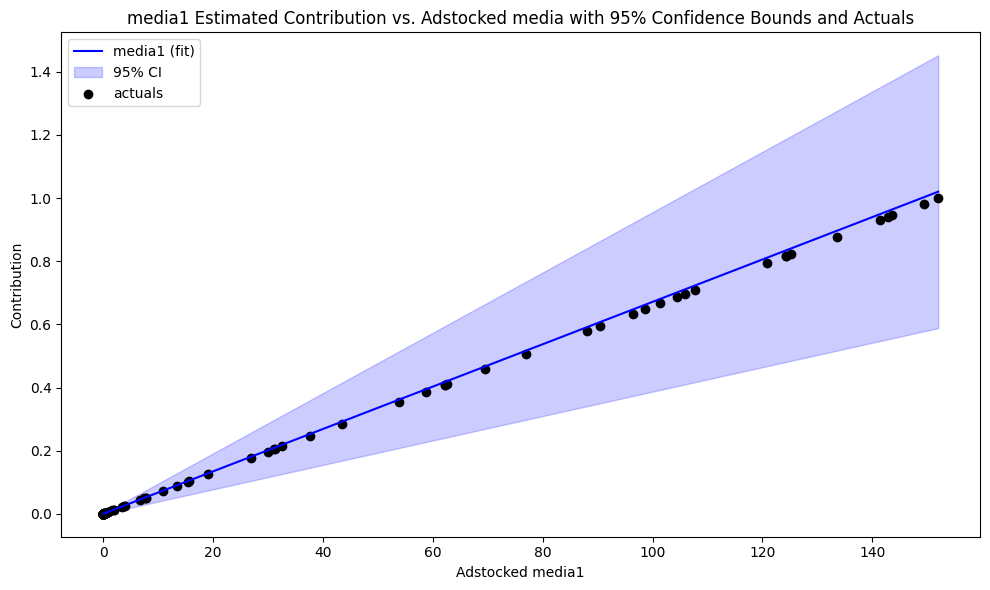

In [8]:
plot_response_curve(model2,'media1', media1_adstock,df_trans_norm2['media1'], df_values2['media1'])

Switch linear media1 in model2 to model1 and regress


In [9]:

X = df_trans_norm.copy()
X['media1']= df_trans_norm2['media1']  # Switch linear media1 in model2 to model1

X = X[[col for col in X.columns if col != 'actual' and col != 'error']]
y = df_values['actual']

X = sm.add_constant(X)
model1a = sm.OLS(y, X).fit()

# Print summary
print(model1a.summary(title="model1 w linear media estimate"))
print("SE %:", round(np.sqrt(model1a.scale)/np.mean(y),3))

                        model1 w linear media estimate                        
Dep. Variable:                 actual   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     155.4
Date:                Thu, 31 Jul 2025   Prob (F-statistic):           6.77e-65
Time:                        09:30:12   Log-Likelihood:                -115.06
No. Observations:                 156   AIC:                             246.1
Df Residuals:                     148   BIC:                             270.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
c               19.9842      0.389     51.377   

In [10]:
# import matplotlib.pyplot as plt

# plt.figure(figsize=(12, 6))
# plt.plot(df_trans_norm.index, df_trans_norm['media1'], label='media1 (df_trans_norm)', color='blue')
# plt.plot(df_trans_norm2.index, df_trans_norm2['media1'], label='media1 (df_trans_norm2)', color='red')
# plt.xlabel('Date')
# plt.ylabel('media1 (normalized)')
# plt.title('Comparison of media1: df_trans_norm vs. df_trans_norm2')
# plt.legend()
# plt.tight_layout()
# plt.show()


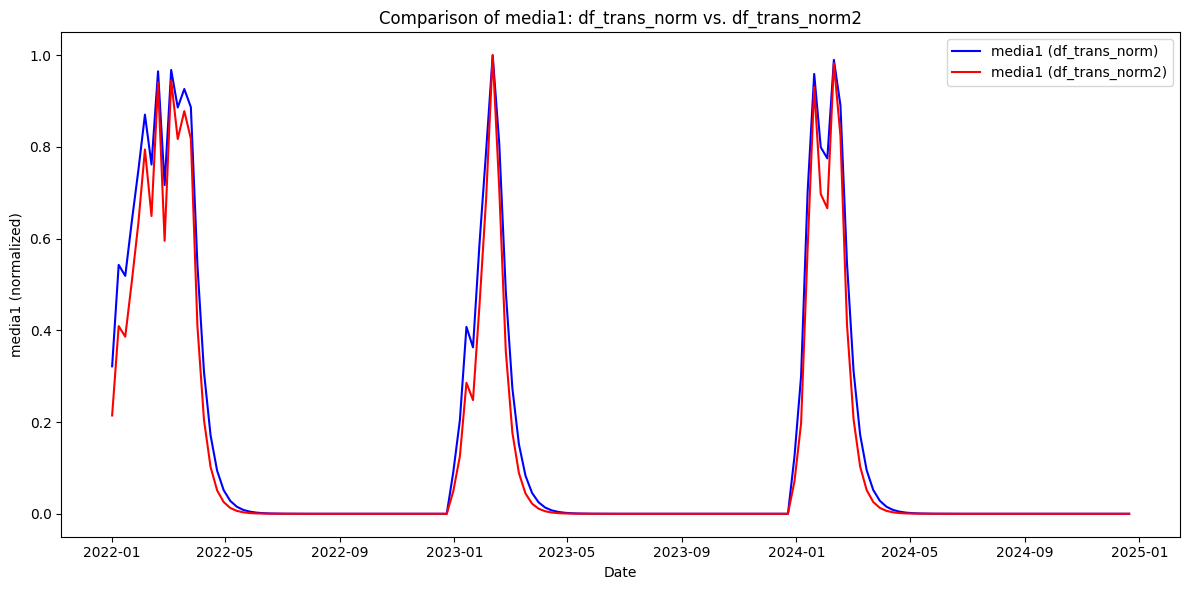

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df_values.index, df_values['media1'], label='media1 (df_trans_norm)', color='blue')
plt.plot(df_values2.index, df_values2['media1'], label='media1 (df_trans_norm2)', color='red')
plt.xlabel('Date')
plt.ylabel('media1 (normalized)')
plt.title('Comparison of media1: df_trans_norm vs. df_trans_norm2')
plt.legend()
plt.tight_layout()
plt.show()

In [12]:
X = df_trans_norm2.copy()
X['media1']= df_trans_norm['media1']  # Switch linear media1 in model2 to model1

X = X[[col for col in X.columns if col != 'actual' and col != 'error']]
y = df_values['actual']

X = sm.add_constant(X)
model2a = sm.OLS(y, X).fit()

# Print summary
print(model2a.summary(title="model2 w saturation media estimate"))
print("Standard error %:", round(np.sqrt(model2a.scale)/np.mean(y),3))

                      model2 w saturation media estimate                      
Dep. Variable:                 actual   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     156.0
Date:                Thu, 31 Jul 2025   Prob (F-statistic):           5.43e-65
Time:                        09:30:12   Log-Likelihood:                -114.83
No. Observations:                 156   AIC:                             245.7
Df Residuals:                     148   BIC:                             270.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
c               19.9194      0.393     50.715   

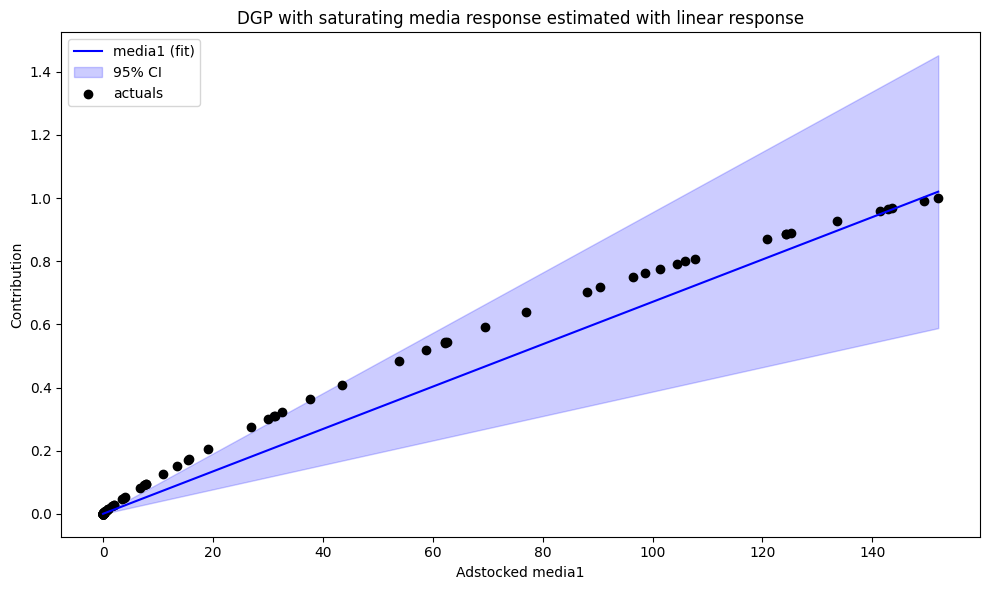

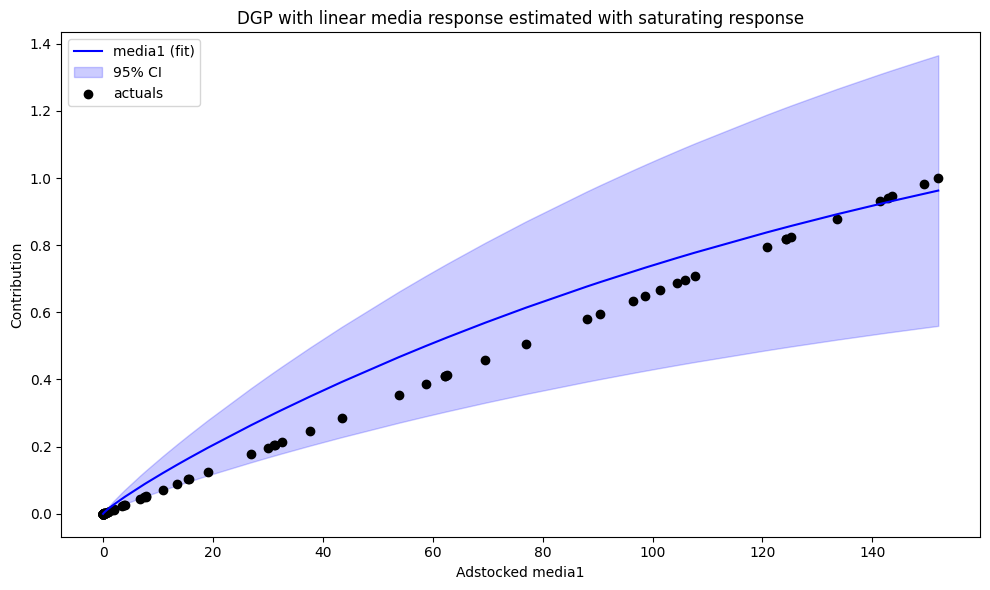

In [13]:
# chart 
plot_response_curve(model1a,'media1', media1_adstock,df_trans_norm2['media1'], df_values['media1'],
                    "DGP with saturating media response estimated with linear response")
# chart 
plot_response_curve(model2a,'media1', media1_adstock,df_trans_norm['media1'], df_values2['media1'],
                    title="DGP with linear media response estimated with saturating response")

In [14]:
# def plot_response_curve(model, series_name, adstock_series, trans_series, actual_series):
#     """
#     Plots coef * trans value vs trans value for a given series, with shaded 95% CI and actuals as a line.
#     Inputs:
#         model: fitted OLS model object
#         series_name: str, name of the variable,
#         adsock_series: Series of adstocked values
#         trans_series: Series of transformed values (to be multiplied by coef)
#         actual_series: Series of actual values (used in dgp)
#         coef: regression coefficient for the variable
#         std_err: standard error for the variable
#     """
#     import numpy as np
#     import matplotlib.pyplot as plt

#     coef = model.params['media1']
#     std_err = model.bse['media1']

#     conf95 = 1.96
#     fit = coef * trans_series
#     err = conf95 * std_err * trans_series.abs()
#     # Sort by trans_series for a smooth line
#     sort_idx = np.argsort(adstock_series)
#     adstock_sorted = adstock_series.values[sort_idx]
#     fit_sorted = fit.values[sort_idx]
#     err_sorted = err.values[sort_idx]
#     actuals_sorted = actual_series.values[sort_idx]
#     plt.figure(figsize=(10, 6))
#     plt.plot(adstock_sorted, fit_sorted, label=f'{series_name} (fit)', color='blue')
#     plt.fill_between(adstock_sorted, fit_sorted - err_sorted, fit_sorted + err_sorted, color='blue', alpha=0.2, label='95% CI')
#     plt.plot(adstock_sorted, actuals_sorted, color='black', label='actuals', linewidth=2, alpha=0.7)
#     plt.xlabel(f'Adstocked {series_name}')
#     plt.ylabel('Contribution (coef * trans)')
#     plt.title(f'{series_name} Estimated Contribution vs. Adstocked media with 95% Confidence Bounds and Actuals')
#     plt.legend()
#     plt.tight_layout()
#     plt.show()